## Elements of Statistical Learning (ESL) Final Project

**Our Machine Learning Question:**

**How can we improve the accuracy of predicting** which diabetic patients are likely to be readmitted to the hospital within 30 days across different classifiers **by addressing the severe class imbalance in the dataset?**
The dataset we chose is on “Early Readmission Prediction of Patients Diagnosed with Diabetes,” which has a significant class imbalance between early admitted patients and others. The positive class for our classification (early admitted patients) is underrepresented with a ratio of 1-to-9.

The techniques we are considering implementing to overcome the class imbalance in the dataset are as follows:
1. SMOTE (Synthetic Minority Oversampling Technique)
2. Class weights
3. Ensemble methods

All the above techniques will be compared across different classifiers to answer the following question: How well do different models (e.g., Logistic Regression, Random Forest, SVM) handle the imbalance and predict early readmissions?

Recommendations from Professor David:

- Check how different models react to class imbalance prior to implementing balancing techniques.
- Also, check if the balancing techniques actually cause that the same objects are misclassified, or that suddenly also other objects go wrong (that used to be classified well).

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Loading and Exploration

The chosen dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days.

Link to the dataset: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

**Our Aim:** Identifying patients at risk of being readmitted within 30 days of discharge.

In [19]:
dataset = pd.read_csv('diabetic_data.csv')

# Explore the first rows of the dataset
dataset.head(20)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [20]:
# Also explore the last rows of the dataset
dataset.tail(20)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101746,443797298,89955270,Caucasian,Male,[70-80),?,1,1,7,4,...,No,No,No,No,No,No,No,No,Yes,<30
101747,443804570,33230016,Caucasian,Female,[70-80),?,1,22,7,8,...,No,Steady,No,No,No,No,No,No,Yes,>30
101748,443811536,189481478,Caucasian,Female,[40-50),?,1,4,7,14,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101749,443816024,106392411,Caucasian,Female,[70-80),?,3,6,1,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
101750,443824292,138784172,Caucasian,Female,[80-90),?,3,1,1,3,...,No,Down,No,No,No,No,No,Ch,Yes,<30
101751,443835140,175326800,Caucasian,Male,[70-80),?,3,6,1,13,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101752,443835512,139605341,Other,Female,[40-50),?,3,1,1,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
101753,443841992,184875899,Other,Male,[40-50),?,1,1,7,13,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101754,443842016,183087545,Caucasian,Female,[70-80),?,1,1,7,9,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,443842022,188574944,Other,Female,[40-50),?,1,1,7,14,...,No,Up,No,No,No,No,No,Ch,Yes,>30


In [21]:
print("Overview of the dataset displaying non-null values and data types:")
print(dataset.info())

Overview of the dataset displaying non-null values and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int6

In [22]:
print("Shape of the dataset:", dataset.shape)
print(dataset.columns)

Shape of the dataset: (101766, 50)
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


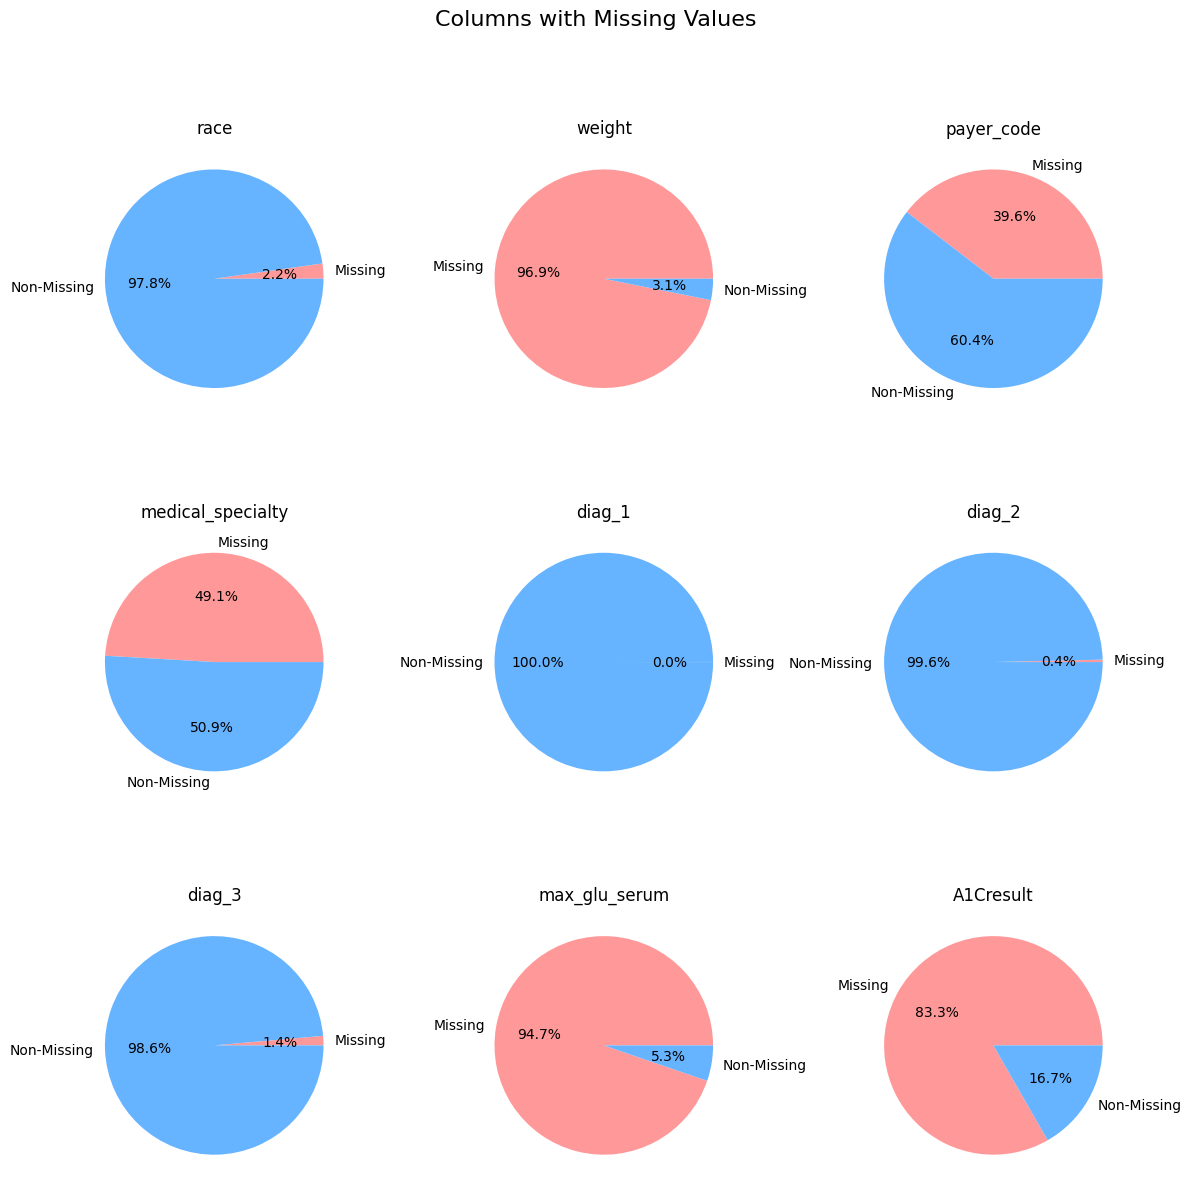

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Visualize columns that contain missing values with pie-charts
dataset_visualization = dataset.copy()
dataset_visualization.replace('?', np.nan, inplace=True)
columns_with_missing = dataset_visualization.columns[dataset_visualization.isnull().any()]

num_columns = len(columns_with_missing)

per_row = 3  
rows = (num_columns // per_row) + (num_columns % per_row > 0)
fig, axes = plt.subplots(rows, per_row, figsize=(per_row * 4, rows * 4))
axes = axes.flatten()

for i, col in enumerate(columns_with_missing):
    missing_count = dataset_visualization[col].isnull().sum()
    non_missing_count = dataset_visualization[col].notnull().sum()
    
    data = [missing_count, non_missing_count]
    labels = ['Missing', 'Non-Missing']
    colors = ['#ff9999', '#66b3ff']

    axes[i].pie(data, labels=labels, autopct='%1.1f%%', colors=colors)
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Columns with Missing Values", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [40]:
target_distribution = dataset['readmitted'].value_counts()

print("Distribution of 'readmitted' target column:")
print(target_distribution)

target_percentage = dataset['readmitted'].value_counts(normalize=True) * 100
print("\nPercentage distribution of 'readmitted' target column:")
print(f"{round(target_percentage, 2)}")

Distribution of 'readmitted' target column:
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Percentage distribution of 'readmitted' target column:
readmitted
NO     53.91
>30    34.93
<30    11.16
Name: proportion, dtype: float64


### Binary Classification Formulation

There are three classes in the target 'readmitted' column:
- Class 1: <30 (early admission)
- Class 2: NO (no admission)
- Class 3: >30 (late admission)

For the purpose of our early admission prediction problem, we will use binary classification because we are looking for a way to classify early admissions correctly in this problem. Therefore, for our problem, the "No" and ">30" cases mean the same and can be combined into the same group.

Hence, the **binary classification** formulation can be described as follows:
- Class 1: <30 (early admission)
- Class 2: NO and >30 (no admission and late admission)

### Understanding the Imbalance in the Dataset

After formulating the dataset as a binary classification problem, it can be seen that the combined percentage of the "No" and ">30" classes is approximately 88.84%, whereas the percentage distribution of the early admission class "<30" is 11.16%.

Hence, it can be seen that there is a severe imbalance in the dataset. The positive class for our classification (early admitted patients) is underrepresented, with a ratio of 1-to-9.

## TODO During the Christmas Break

Link to the Google sheets for writing down comments on the dataset columns and rationalizing the implemented approaches:
https://docs.google.com/spreadsheets/d/1wQvVQijqFmdOWjL4nJtSQ5hRea5tVSDQo9-br04bgew/edit?usp=sharing

## Data Exploration Ideas

### 1. Missing Value Handling
- **Indicator of Missing Values**: Missing values are represented by `?` in the dataset.
- **Imputation Strategies**:
  - **Baseline Approach: Deleting the Rows with Missing Values:** Remove rows that contain at least one missing value in any column.
  - **Correlation-based Imputation**: Identify which features are highly correlated and impute missing values accordingly.
  - **Statistical Methods**:
    - For **categorical features**: Use the most frequent class (mode).
    - For **numerical features**: Use the mean, median, or a neighbor-based approach (e.g., K-Nearest Neighbors).
      - **Note**: Research the name of the neighbor-based imputation technique (e.g., KNN Imputation).
- **Documentation**: Record the rationale behind the chosen imputation strategy.

### 2. Feature Reduction & Extraction
- **Initial Cleanup**:
  - Drop non-informative columns such as:
    - ID fields.
    - Columns with constant values (e.g., same value for all rows).
- **Rationale**: Clearly document why specific columns were dropped.

- **Dimensionality Reduction**:
  - Implement methods like **Principal Component Analysis (PCA)**.
  - **Library**: Check if Scikit-learn has built-in functions for feature extraction or reduction.
  - Alternatively, develop custom logic for feature reduction based on feature correlation.
- **Rationale**: Justify the use of any dimensionality reduction method and its impact on the dataset.

---

## Data Preprocessing Ideas

### 1. Normalization
- **Research Questions**:
  - Which features require normalization?
    - Should normalization apply only to the target class or to all features?
- **Initial Assumption**:
  - Normalization should be applied to all features since some classifiers are sensitive to feature scaling.
- **Documentation**: Record the decision and reasoning behind normalization.

### 2. Handling Class Imbalance
- **Techniques to Address Imbalance**:
  1. **SMOTE (Synthetic Minority Oversampling Technique)**: Generate synthetic samples for the minority class.
  2. **Class Weights**: Assign higher weights to the minority class during training.
  3. **Ensemble Methods**: Use techniques like Random Forest or Bagging that are robust to imbalanced data.
- **Classifier Dependency**:
  - Some imbalance techniques are suitable only for specific classification algorithms.
  - **Documentation**: Clearly note the classifiers compatible with each imbalance-handling technique.

---

## Notes
- Keep a record of all decisions and approaches in the notebook or Markdown.
- Justify each step with reasoning or research findings for transparency and reproducibility.

---

# Handling Data Imbalance Techniques

## 1. SMOTE (Synthetic Minority Oversampling Technique)
- **Purpose**: Generates synthetic samples for the minority class to balance the dataset.
- **How it Works**: SMOTE creates new samples by interpolating between existing minority class examples.
- **Extensions**:
  - Borderline SMOTE: Focuses on samples near the decision boundary.
  - ADASYN: Generates more synthetic samples for harder-to-learn minority examples.
  - SMOTETomek: Combines SMOTE with Tomek Links to clean the dataset.
- **Resources**:
  - [SMOTE for Imbalanced Classification](https://www.geeksforgeeks.org/smote-for-imbalanced-classification-with-python/): Includes table for when to use each variant.
  - [imblearn.over_sampling.SMOTE Documentation](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).

---

## 2. Class Weights
- **Purpose**: Adjust model training to account for class imbalance.
- **How it Works**: Assigns higher weights to the minority class, forcing the model to focus on it more.
- **F1 Score Formula**:
  \[ F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} \]
  - If F1 = 0, the model performs poorly on the minority class.
- **Implementation**:
  - Use the `class_weight` parameter in classifiers such as Scikit-learn, LightGBM, or CatBoost.
    - Example: For Logistic Regression, set `class_weight='balanced'` or provide manual weights.
- **Resources**:
  - [Improve Class Imbalance Using Class Weights](https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/).
  - [How to Set Class Weights in Keras](https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras).

---

## 3. Ensemble Methods
- **Purpose**: Combines multiple classifiers to improve performance and handle class imbalance.
- **Techniques**:
  - **Data-Level Approaches**:
    - **Undersampling**: Reduces the majority class size.
    - **Oversampling**: Increases the minority class size.
    - **Hybrid Approaches**: Combines under and oversampling methods.
  - **Algorithm-Level Techniques**:
    - **Cost-Sensitive Learning**: Assigns different misclassification costs to classes.
    - **Threshold-Moving**: Adjusts the decision threshold to favor the minority class.
  - **Ensemble Learning Methods**:
    - **Bagging**: SMOTEBagging – Combines SMOTE with bagging methods.
    - **Boosting**: RUSBoost – Applies random undersampling with boosting.
    - **Stacking**: EasyEnsemble – Combines multiple models with data resampling.
    - **Hybrid Methods**: Mix bagging + boosting, hybrid sampling + ensemble learning, or dynamic selection + preprocessing.
- **Resources**:
  - [Ensemble Techniques for Class Imbalance](https://thecontentfarm.net/ensemble-techniques-for-handling-class-imbalance/).


### Setting up the Dataset

- Merge the ">30" and "NO" categories of the target variable
- Split the dataset into training and test sets first, ensuring that all preprocessing steps are based on the training data. This will prevent **data leakage**. In other words, information from the test set will not influence the model during training.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Merging ">30" and "NO" (not readmitted) categories of the target variable
dataset['readmitted'] = dataset['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

dataset.head(20)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,0
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,0
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,0
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,0
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,0


#### Data Splitting

In [42]:
# Isolate target column
X = dataset.drop('readmitted', axis=1) # inplace=False (default)
y = dataset['readmitted']

# Splitting the dataset in training and test sets
# From this point on, we will only use the training set until we test the models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TODO grouping by patient_nbr? to prevent data leakage
# We can't have information of the same person being separated in training and test sets

# dropping id columns
dataset = dataset.drop(columns=['encounter_id', 'patient_nbr'], axis=1)
X_train = X_train.drop(columns=['encounter_id', 'patient_nbr'], axis=1)
X_test = X_test.drop(columns=['encounter_id', 'patient_nbr'], axis=1)

data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1) # Training dataset
test_data = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1) # Test dataset

print("Shape of the original dataset:", dataset.shape)
print("Shape of the training dataset (data):", data.shape)
print("Shape of the test dataset (test_data):", test_data.shape)

Shape of the original dataset: (101766, 48)
Shape of the training dataset (data): (81412, 48)
Shape of the test dataset (test_data): (20354, 48)


### Missing Value Handling

In [43]:
missing_values = data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print(f"Columns with missing values:\n{columns_with_missing_values}")

Columns with missing values:
max_glu_serum    77130
A1Cresult        67793
dtype: int64


It is observed from the dataset that in some columns, missing values are represented by the '?' character. Hence, a second data exploration step for analyzing which columns contain the question mark character and their counts is conducted.

In [44]:
question_marks = (data == '?').sum()
columns_with_question_marks = question_marks[question_marks > 0]
print(f"Columns containing question marks and their counts:\n{columns_with_question_marks}")

Columns containing question marks and their counts:
race                  1811
weight               78916
payer_code           32157
medical_specialty    40057
diag_1                  13
diag_2                 281
diag_3                1136
dtype: int64


Based on this observation, we decided to find the summation of missing values (both NaN and ? characters).

In [45]:
total_missing_values = missing_values + question_marks
columns_with_all_missing_values = total_missing_values[total_missing_values > 0]
print("Columns with missing values (including '?' and NaN):")
print(columns_with_all_missing_values)

Columns with missing values (including '?' and NaN):
race                  1811
weight               78916
payer_code           32157
medical_specialty    40057
diag_1                  13
diag_2                 281
diag_3                1136
max_glu_serum        77130
A1Cresult            67793
dtype: int64


In [46]:
# Convert '?'s into pandas NA values
data = data.replace('?', pd.NA)
test_data = test_data.replace('?', pd.NA)

# Check to see if the missing value summations match with the previous cell's output
missing_values = data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print(f"Columns with missing values:\n{columns_with_missing_values}")

assert (total_missing_values == missing_values).all(), "Mismatch in missing value summations!"

# If the assertion is successful, print a success message
print("\nConsistency check passed: Missing value summations match for '?' and NaN handling.")

Columns with missing values:
race                  1811
weight               78916
payer_code           32157
medical_specialty    40057
diag_1                  13
diag_2                 281
diag_3                1136
max_glu_serum        77130
A1Cresult            67793
dtype: int64

Consistency check passed: Missing value summations match for '?' and NaN handling.


#### Baseline Approach: Deleting the Rows with Missing Values

Remove rows that contain at least one missing value in any column.

In [47]:
data_dropped = data.dropna()
print(f"Original dataset shape: {data.shape}")
print(f"Cleaned dataset shape after dropping rows: {data_dropped.shape}")

Original dataset shape: (81412, 48)
Cleaned dataset shape after dropping rows: (0, 48)


It is observed from the output of the previous cell that no rows remain in the dataset when we drop the rows containing a missing value. This suggests that each row contains at least one missing value.

Hence, a more sophisticated missing-value handling is needed.

Firstly, the following three columns contain between approximately 83% - 97% missing values:
- weight               (78916 missing values out of 81412)
- max_glu_serum        (77130 missing values out of 81412)
- A1Cresult            (67793 missing values out of 81412)

Hence, they are not informative and can be dropped before continuing with the rest of the analysis.


In [48]:
print(f"Original training dataset shape: {data.shape}")
columns_to_drop = ['weight', 'max_glu_serum', 'A1Cresult']
data = data.drop(columns=columns_to_drop, axis=1)
print(f"Training dataset shape after dropping columns: {data.shape}")

# Drop the same columns from the test data as well
print(f"Original test dataset shape: {test_data.shape}")
test_data = test_data.drop(columns=columns_to_drop, axis=1)
print(f"Test dataset shape after dropping columns: {test_data.shape}")

# Drop the same columns from the test data as well
print(f"Entire dataset shape: {dataset.shape}")
dataset = dataset.drop(columns=columns_to_drop, axis=1)
print(f"Entire dataset shape after dropping columns: {dataset.shape}")

Original training dataset shape: (81412, 48)
Training dataset shape after dropping columns: (81412, 45)
Original test dataset shape: (20354, 48)
Test dataset shape after dropping columns: (20354, 45)
Entire dataset shape: (101766, 48)
Entire dataset shape after dropping columns: (101766, 45)


NOTE: The two columns that contain approximately 50% missing values can also be dropped. Discuss it with your teammates.

- payer_code           (32157 missing values out of 81412)
- medical_specialty    (40057 missing values out of 81412)

In [49]:
# Now, again remove rows that contain at least one missing value in any column.
print(f"Dataset shape before dropping rows: {data.shape}")
data_dropped = data.dropna()
print(f"Cleaned dataset shape after dropping rows: {data_dropped.shape}")

Dataset shape before dropping rows: (81412, 45)
Cleaned dataset shape after dropping rows: (21409, 45)


**Observation**

Since a significant amount (a forth) of all entries have been deleted, *Deleting the Rows with Missing Values* is not the most reasonable approach but it'll serve as a baseline for the filling of missing values.

#### Correlation-based Imputation

Identify which features are highly correlated and impute missing values accordingly.

In [50]:
print("Column types before applying mapping:")
print(data.dtypes[:25])

Column types before applying mapping:
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
dtype: object


In [51]:
print("Column types before applying mapping:")
print(data.dtypes[25:])

# First, apply mapping to non-numeric columns,
# prior to computing the correlation between the features

data_encoded = data.copy()
for column in data.select_dtypes(include=['object', 'category']).columns:
    data_encoded[column] = data_encoded[column].astype('category').cat.codes

Column types before applying mapping:
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide                  object
examide                     object
citoglipton                 object
insulin                     object
glyburide-metformin         object
glipizide-metformin         object
glimepiride-pioglitazone    object
metformin-rosiglitazone     object
metformin-pioglitazone      object
change                      object
diabetesMed                 object
readmitted                   int64
dtype: object


In [52]:
print("Column types after applying mapping:")
print(data_encoded.dtypes[:25])

Column types after applying mapping:
race                         int8
gender                       int8
age                          int8
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
payer_code                   int8
medical_specialty            int8
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
diag_1                      int16
diag_2                      int16
diag_3                      int16
number_diagnoses            int64
metformin                    int8
repaglinide                  int8
nateglinide                  int8
chlorpropamide               int8
glimepiride                  int8
acetohexamide                int8
dtype: object


In [53]:
print("Column types after applying mapping:")
print(data_encoded.dtypes[25:])

Column types after applying mapping:
glipizide                    int8
glyburide                    int8
tolbutamide                  int8
pioglitazone                 int8
rosiglitazone                int8
acarbose                     int8
miglitol                     int8
troglitazone                 int8
tolazamide                   int8
examide                      int8
citoglipton                  int8
insulin                      int8
glyburide-metformin          int8
glipizide-metformin          int8
glimepiride-pioglitazone     int8
metformin-rosiglitazone      int8
metformin-pioglitazone       int8
change                       int8
diabetesMed                  int8
readmitted                  int64
dtype: object


In [54]:
# Check the first 5 rows of the mapped data to see the encodings
print(data_encoded.head)

<bound method NDFrame.head of        race  gender  age  admission_type_id  discharge_disposition_id  \
0         0       0    7                  1                        23   
1         3       1    5                  1                         1   
2         2       1    6                  2                         1   
3         0       0    5                  1                         1   
4         0       0    3                  1                         3   
...     ...     ...  ...                ...                       ...   
81407     2       1    8                  1                         6   
81408     2       0    8                  1                         3   
81409     2       1    7                  1                         2   
81410     0       1    4                  3                         1   
81411     0       0    7                  1                         3   

       admission_source_id  time_in_hospital  payer_code  medical_specialty  \
0             

In [55]:
# Now, compute the correlation matrix using the encoded data

correlation_matrix = data_encoded.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                              race    gender       age  admission_type_id  \
race                      1.000000  0.055652  0.116916           0.100863   
gender                    0.055652  1.000000 -0.049352           0.015408   
age                       0.116916 -0.049352  1.000000          -0.006461   
admission_type_id         0.100863  0.015408 -0.006461           1.000000   
discharge_disposition_id  0.008952 -0.022655  0.114997           0.085281   
admission_source_id       0.031070 -0.000991  0.041862           0.106116   
time_in_hospital         -0.013439 -0.030128  0.106493          -0.012294   
payer_code                0.035961 -0.000639  0.062508          -0.140082   
medical_specialty        -0.030110  0.011782 -0.065900           0.188340   
num_lab_procedures       -0.023255 -0.003833  0.020925          -0.146526   
num_procedures            0.028764  0.060294 -0.028965           0.129120   
num_medications           0.030767 -0.023684  0.042470  

In [56]:
def compute_high_correlations(correlation_threshold, corr_matrix): # TODO changed the name from correlation_matrix -M
    """
        Method for calculating highly correlated features above a given threshold
    """
    highly_correlated_features = corr_matrix[(corr_matrix.abs() > correlation_threshold) & (corr_matrix != 1.0)]
    print(f"\nHighly Correlated Features (Threshold > {correlation_threshold}):")
    print(highly_correlated_features.dropna(how="all", axis=0).dropna(how="all", axis=1))

In [57]:
compute_high_correlations(correlation_threshold=0.6, corr_matrix=correlation_matrix)
compute_high_correlations(correlation_threshold=0.5, corr_matrix=correlation_matrix)


Highly Correlated Features (Threshold > 0.6):
Empty DataFrame
Columns: []
Index: []

Highly Correlated Features (Threshold > 0.5):
               change  diabetesMed
change            NaN    -0.506879
diabetesMed -0.506879          NaN


**Important Observation**

It has been observed that the highest correlation among the features is 0.5 in magnitude (as the absolute values of the correlation matrix are used for computations). No correlations above this threshold have been observed.

Since 0.5 is not considered a high correlation, implementing a correlation-based imputation technique for handling missing values does not seem plausible.

#### Chosen Imputation Approach: Statistical Methods for Missing Value Handling

- Missing values in **categorical features** will be imputed using the most frequent class (mode).

- Missing values in **numerical features** will be imputed using the **k-nearest neighbor (KNN) imputation approach**.

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

print("Shape of training dataset before imputation:", data.shape)
print("Shape of test dataset before imputation:", test_data.shape)

# All NA values are converted into nan for compatibility with sklearn
data_impute = data.replace({pd.NA: np.nan})
test_data_impute = test_data.replace({pd.NA: np.nan})

categorical_columns = data_impute.select_dtypes(include=['object', 'category']).columns
numerical_columns = data_impute.select_dtypes(include=['number']).columns

# Handling missing values in categorical features using Simple Imputer with "most frequent" strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_impute[categorical_columns] = categorical_imputer.fit_transform(data_impute[categorical_columns])
test_data_impute[categorical_columns] = categorical_imputer.transform(test_data_impute[categorical_columns])

# Handling missing values in numerical features using KNN Imputer with the given k value
k = 5 # TODO test different k values with pipeline
numerical_imputer = KNNImputer(n_neighbors=k)
data_impute[numerical_columns] = numerical_imputer.fit_transform(data_impute[numerical_columns])
test_data_impute[numerical_columns] = numerical_imputer.transform(test_data_impute[numerical_columns])

print("Shape of training dataset after imputation:", data_impute.shape)
print("Shape of test dataset after imputation:", test_data_impute.shape)
print("Total missing values in training dataset after imputation:", data_impute.isnull().sum().sum())
print("Total missing values in test dataset after imputation:", test_data_impute.isnull().sum().sum())

print("First 20 Rows of the Imputed Training Dataset:")
data_impute.head(10)

Shape of training dataset before imputation: (81412, 45)
Shape of test dataset before imputation: (20354, 45)
Shape of training dataset after imputation: (81412, 45)
Shape of test dataset after imputation: (20354, 45)
Total missing values in training dataset after imputation: 0
Total missing values in test dataset after imputation: 0
First 20 Rows of the Imputed Training Dataset:


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,AfricanAmerican,Female,[70-80),1.0,23.0,5.0,11.0,MC,InternalMedicine,45.0,...,No,Up,No,No,No,No,No,Ch,Yes,0.0
1,Hispanic,Male,[50-60),1.0,1.0,7.0,1.0,MD,Nephrology,32.0,...,No,Down,No,No,No,No,No,Ch,Yes,0.0
2,Caucasian,Male,[60-70),2.0,1.0,1.0,5.0,UN,InternalMedicine,46.0,...,No,Steady,No,No,No,No,No,No,Yes,0.0
3,AfricanAmerican,Female,[50-60),1.0,1.0,7.0,1.0,MC,InternalMedicine,36.0,...,No,Steady,No,No,No,No,No,Ch,Yes,0.0
4,AfricanAmerican,Female,[30-40),1.0,3.0,5.0,10.0,MC,InternalMedicine,54.0,...,No,No,No,No,No,No,No,No,Yes,0.0
5,Caucasian,Female,[80-90),1.0,1.0,7.0,5.0,MC,InternalMedicine,36.0,...,No,Up,No,No,No,No,No,Ch,Yes,1.0
6,Caucasian,Male,[40-50),6.0,1.0,17.0,1.0,MC,InternalMedicine,43.0,...,No,Steady,No,No,No,No,No,No,Yes,0.0
7,Caucasian,Male,[50-60),1.0,1.0,7.0,5.0,MC,InternalMedicine,27.0,...,No,Up,No,No,No,No,No,Ch,Yes,0.0
8,Caucasian,Male,[60-70),2.0,1.0,1.0,2.0,MC,InternalMedicine,38.0,...,No,No,No,No,No,No,No,No,No,0.0
9,Caucasian,Male,[20-30),1.0,1.0,7.0,1.0,CP,InternalMedicine,13.0,...,No,Down,No,No,No,No,No,Ch,Yes,0.0


In [59]:
print("First 20 Rows of the Imputed Test Dataset:")
test_data_impute.head(10)

First 20 Rows of the Imputed Test Dataset:


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[80-90),1.0,1.0,7.0,4.0,MC,InternalMedicine,40.0,...,No,Up,No,No,No,No,No,Ch,Yes,0.0
1,AfricanAmerican,Male,[60-70),1.0,1.0,7.0,5.0,MC,InternalMedicine,29.0,...,No,Steady,No,No,No,No,No,No,Yes,0.0
2,Caucasian,Female,[70-80),3.0,22.0,1.0,2.0,MC,Orthopedics-Reconstructive,26.0,...,No,Up,No,No,No,No,No,Ch,Yes,0.0
3,Caucasian,Male,[50-60),3.0,18.0,1.0,5.0,MC,InternalMedicine,43.0,...,No,No,No,No,No,No,No,No,No,1.0
4,AfricanAmerican,Male,[70-80),6.0,22.0,17.0,12.0,MC,Pulmonology,77.0,...,No,No,No,No,No,No,No,Ch,Yes,1.0
5,Caucasian,Male,[50-60),5.0,2.0,17.0,1.0,SP,InternalMedicine,18.0,...,No,No,No,No,No,No,No,No,No,0.0
6,AfricanAmerican,Male,[70-80),1.0,1.0,7.0,3.0,MC,InternalMedicine,37.0,...,No,No,No,No,No,No,No,No,No,0.0
7,Hispanic,Female,[60-70),1.0,1.0,6.0,4.0,UN,InternalMedicine,51.0,...,No,Steady,No,No,No,No,No,Ch,Yes,0.0
8,Caucasian,Male,[50-60),1.0,22.0,7.0,2.0,MC,InternalMedicine,44.0,...,No,Steady,No,No,No,No,No,Ch,Yes,0.0
9,Hispanic,Male,[50-60),2.0,18.0,1.0,8.0,MC,InternalMedicine,52.0,...,No,No,No,No,No,No,No,No,No,0.0


### One-Hot Encoding

Encode non-numerical features in the dataset.

In [60]:
from sklearn.preprocessing import OneHotEncoder

data_onehot = data_impute.copy() # Training dataset used for all the preprocessing

# this is already done above
# data_onehot['binary'] = data_onehot['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
# data_onehot.drop(['readmitted'], axis=1, inplace=True)

categorical_features = data_onehot.select_dtypes(include=['object', 'category']).columns
numerical_features = data_onehot.select_dtypes(include=['number']).columns

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(data_onehot[categorical_features])

encoded_train = encoder.transform(data_onehot[categorical_features])
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_features))

encoded_test = encoder.transform(test_data_impute[categorical_features])
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_features))

data_onehot = pd.concat([data_onehot.reset_index(drop=True).drop(columns=categorical_features), encoded_train_df], axis=1)
test_onehot = pd.concat([test_data_impute.reset_index(drop=True).drop(columns=categorical_features), encoded_test_df], axis=1)

print(f"Training Dataset Shape Before Encoding: {data_impute.shape}")
print(f"Training Dataset Shape After Encoding: {data_onehot.shape}")
print(data_onehot.head())

print(f"Test Dataset Shape Before Encoding: {test_data_impute.shape}")
print(f"Test Dataset Shape After Encoding: {test_onehot.shape}")
print(test_onehot.head())

Training Dataset Shape Before Encoding: (81412, 45)
Training Dataset Shape After Encoding: (81412, 2356)
   admission_type_id  discharge_disposition_id  admission_source_id  \
0                1.0                      23.0                  5.0   
1                1.0                       1.0                  7.0   
2                2.0                       1.0                  1.0   
3                1.0                       1.0                  7.0   
4                1.0                       3.0                  5.0   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0              11.0                45.0             1.0             18.0   
1               1.0                32.0             4.0             15.0   
2               5.0                46.0             2.0             16.0   
3               1.0                36.0             0.0             11.0   
4              10.0                54.0             3.0             16.0   

   number_o

Observation about One-Hot Encoding

One-hot encoding increases the number of features drastically, from 45 features to 2356 features. Hence, it is not selected as the encoding method due to its inefficiency in feature reduction.

#### Label Encoding 

Use sklearn's label encoder to convert the categorical columns into numeric.

In [24]:
from sklearn import preprocessing

# Apply mapping to non-numeric columns
mapped_data = data_impute.copy() # Training data
test_mapped_data = test_data_impute.copy() # Test data

for column in dataset.select_dtypes(include=['object', 'category']).columns:
    label_encoder = preprocessing.LabelEncoder()
    trained_le = label_encoder.fit(dataset[column]) # Using the original dataset to correctly encapture all unique categorical values 
    mapped_data[column] = trained_le.transform(mapped_data[column])
    test_mapped_data[column] = trained_le.transform(test_mapped_data[column])

mapped_data.head(20)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,0,7,1.0,23.0,5.0,11.0,8,19,45.0,...,0,3,1,0,0,0,0,0,1,0.0
1,4,1,5,1.0,1.0,7.0,1.0,9,20,32.0,...,0,0,1,0,0,0,0,0,1,0.0
2,3,1,6,2.0,1.0,1.0,5.0,16,19,46.0,...,0,2,1,0,0,0,0,1,1,0.0
3,1,0,5,1.0,1.0,7.0,1.0,8,19,36.0,...,0,2,1,0,0,0,0,0,1,0.0
4,1,0,3,1.0,3.0,5.0,10.0,8,19,54.0,...,0,1,1,0,0,0,0,1,1,0.0
5,3,0,8,1.0,1.0,7.0,5.0,8,19,36.0,...,0,3,1,0,0,0,0,0,1,1.0
6,3,1,4,6.0,1.0,17.0,1.0,8,19,43.0,...,0,2,1,0,0,0,0,1,1,0.0
7,3,1,5,1.0,1.0,7.0,5.0,8,19,27.0,...,0,3,1,0,0,0,0,0,1,0.0
8,3,1,6,2.0,1.0,1.0,2.0,8,19,38.0,...,0,1,1,0,0,0,0,1,0,0.0
9,3,1,2,1.0,1.0,7.0,1.0,4,19,13.0,...,0,0,1,0,0,0,0,0,1,0.0


In [25]:
test_mapped_data.head(20)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,3,0,8,1.0,1.0,7.0,4.0,8,19,40.0,...,0,3,1,0,0,0,0,0,1,0.0
1,1,1,6,1.0,1.0,7.0,5.0,8,19,29.0,...,0,2,1,0,0,0,0,1,1,0.0
2,3,0,7,3.0,22.0,1.0,2.0,8,29,26.0,...,0,3,1,0,0,0,0,0,1,0.0
3,3,1,5,3.0,18.0,1.0,5.0,8,19,43.0,...,0,1,1,0,0,0,0,1,0,1.0
4,1,1,7,6.0,22.0,17.0,12.0,8,52,77.0,...,0,1,1,0,0,0,0,0,1,1.0
5,3,1,5,5.0,2.0,17.0,1.0,15,19,18.0,...,0,1,1,0,0,0,0,1,0,0.0
6,1,1,7,1.0,1.0,7.0,3.0,8,19,37.0,...,0,1,1,0,0,0,0,1,0,0.0
7,4,0,6,1.0,1.0,6.0,4.0,16,19,51.0,...,0,2,1,0,0,0,0,0,1,0.0
8,3,1,5,1.0,22.0,7.0,2.0,8,19,44.0,...,0,2,1,0,0,0,0,0,1,0.0
9,4,1,5,2.0,18.0,1.0,8.0,8,19,52.0,...,0,1,1,0,0,0,0,1,0,0.0


### Scaling (Z-score Normalization)

In [26]:
# Scaling
X_train_mapped_data = mapped_data.drop(columns=['readmitted'])
X_test_mapped_data = test_mapped_data.drop(columns=['readmitted'])

scaler = StandardScaler()
scaler.fit(X_train_mapped_data)  # Fit on training data only
X_train_mapped_data = pd.DataFrame(scaler.transform(X_train_mapped_data), columns=X_train_mapped_data.columns)
X_test_mapped_data = pd.DataFrame(scaler.transform(X_test_mapped_data), columns=X_test_mapped_data.columns)

for column in X_train_mapped_data.columns:
    mapped_data[column] = X_train_mapped_data[column]
    test_mapped_data[column] = X_test_mapped_data[column]

### Feature Reduction & Extraction Approaches

#### 1. Feature Reduction

#### 1.1 Variance Threshold Feature Reduction Approach

In [27]:
from sklearn.feature_selection import VarianceThreshold

X_train_mapped = mapped_data.drop(columns=['readmitted'])

selector = VarianceThreshold(threshold=0)

selector.fit(X_train_mapped)
selector.get_support()

cols = [column for column in X_train_mapped.columns
          if column not in X_train_mapped.columns[selector.get_support()]]

print("Columns removed due to having 0 variance:")
print(cols)

print("Shape of training dataset before dropping 0 variance columns:", mapped_data.shape)
print("Shape of test dataset before dropping 0 variance columns::", test_mapped_data.shape)

mapped_data.drop(cols, axis=1, inplace=True)
test_mapped_data.drop(cols, axis=1, inplace=True)

print("Shape of training dataset after dropping 0 variance columns:", mapped_data.shape)
print("Shape of test dataset after dropping 0 variance columns::", test_mapped_data.shape)

Columns removed due to having 0 variance:
['acetohexamide', 'troglitazone', 'examide', 'citoglipton']
Shape of training dataset before dropping 0 variance columns: (81412, 45)
Shape of test dataset before dropping 0 variance columns:: (20354, 45)
Shape of training dataset after dropping 0 variance columns: (81412, 41)
Shape of test dataset after dropping 0 variance columns:: (20354, 41)


#### Correlation-based Feature Reduction Approach

In [28]:
# Computing the correlation matrix on the mapped training dataset
corr_matrix_mapped = mapped_data.corr()
print("Correlation Matrix for Mapped Data:")
print(corr_matrix_mapped)

Correlation Matrix for Mapped Data:
                              race    gender       age  admission_type_id  \
race                      1.000000  0.067023  0.131129           0.102666   
gender                    0.067023  1.000000 -0.049352           0.015408   
age                       0.131129 -0.049352  1.000000          -0.006461   
admission_type_id         0.102666  0.015408 -0.006461           1.000000   
discharge_disposition_id -0.006628 -0.022655  0.114997           0.085281   
admission_source_id       0.018887 -0.000991  0.041862           0.106116   
time_in_hospital         -0.018476 -0.030128  0.106493          -0.012294   
payer_code                0.029707  0.001454  0.006207           0.018405   
medical_specialty        -0.007681  0.018606 -0.051189           0.122536   
num_lab_procedures       -0.021619 -0.003833  0.020925          -0.146526   
num_procedures            0.030868  0.060294 -0.028965           0.129120   
num_medications           0.031532 -0.02

In [29]:
compute_high_correlations(correlation_threshold=0.6, corr_matrix=corr_matrix_mapped)
compute_high_correlations(correlation_threshold=0.5, corr_matrix=corr_matrix_mapped)


Highly Correlated Features (Threshold > 0.6):
Empty DataFrame
Columns: []
Index: []

Highly Correlated Features (Threshold > 0.5):
               change  diabetesMed
change            NaN    -0.506879
diabetesMed -0.506879          NaN


**Observation:**

The highest correlation among the features is 0.5 in absolute value. Since 0.5 is not considered a high correlation, implementing a correlation-based feature reduction technique on the imputated data does not seem plausible.

Alternative method:

In [30]:
def remove_high_corr_features(data_set, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_mtrx = data_set.corr()
    # pd.DataFrame(data={'c0': [1, 2, 3], 'c1': [4, 5, 6], 'c2': [7, 8, 9]})

    for i in range(1, len(corr_mtrx.columns)):
        for j in range(0, i):
            # print("(", i, ", ", j, "):", corr_mtrx.iloc[i, j])
            # print(corr_mtrx.columns[j])

            if (abs(corr_mtrx.iloc[i, j]) >= threshold) and (corr_mtrx.columns[j] not in col_corr):
                col_name = corr_mtrx.columns[j] # getting the name of column
                col_corr.add(col_name)
                # print(col_corr) # -> columns that are removed due to having above the threshold absolute correlation

                if col_name in data_set.columns:
                    data_set.drop(columns=col_name, inplace=True)
                    # print(data_set)
                    # print(corr_mtrx) # -> dataset's correlation matrix

    print("Deleted", len(col_corr), "columns with threshold", threshold)
    print(col_corr)

In [31]:
X_train_mapped = mapped_data.drop(columns=['readmitted'])

remove_high_corr_features(X_train_mapped, 0.6)

Deleted 0 columns with threshold 0.6
set()


#### 2. Feature Selection

#### 2.1 Forward Selection (Wrapper Approach)

In [32]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

# Use mapped_data and test_mapped_data datasets
# The current number of features is 41!

X_train = mapped_data.drop(columns=['readmitted'])
y_train = mapped_data['readmitted']

X_test = test_mapped_data.drop(columns=['readmitted'])
y_test = test_mapped_data['readmitted']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Testing the possible values for k_features 
# For forward feature selection
k_features = [5, 8, 12, 15, 18, 20]

forward_best_k = 0
forward_best_val_score = 0
forward_selected_features = []

for k in k_features:
    clf = LogisticRegression(max_iter=500)
    ffs = sfs(clf, k_features=k, forward=True, floating=False, verbose=0, scoring='f1', cv=5) # 5-fold cross validation 

    ffs.fit(X_train, y_train)
    selected_features = list(ffs.k_feature_names_)  # Selected features
    print(f"Selected {k} features: {selected_features}")

    # Use selected features to fit a logistic classifier and evaluate on validation set
    clf.fit(X_train[selected_features], y_train)
    val_score = clf.score(X_val[selected_features], y_val)  
    
    print(f"Validation score for {k} features: {val_score}")

    if val_score > forward_best_val_score:
        forward_best_k = k
        forward_best_val_score = val_score
        forward_selected_features = selected_features

print(f"\nBest number of features: {forward_best_k} with Validation score: {forward_best_val_score}")

Selected 5 features: ['admission_source_id', 'number_inpatient', 'repaglinide', 'rosiglitazone', 'diabetesMed']
Validation score for 5 features: 0.8862617453786157
Selected 8 features: ['admission_type_id', 'admission_source_id', 'payer_code', 'number_inpatient', 'repaglinide', 'tolbutamide', 'rosiglitazone', 'diabetesMed']
Validation score for 8 features: 0.8862003316342197
Selected 12 features: ['admission_type_id', 'admission_source_id', 'payer_code', 'number_inpatient', 'repaglinide', 'nateglinide', 'tolbutamide', 'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide', 'diabetesMed']
Validation score for 12 features: 0.8862003316342197
Selected 15 features: ['admission_type_id', 'admission_source_id', 'payer_code', 'number_inpatient', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glyburide', 'tolbutamide', 'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide', 'glyburide-metformin', 'diabetesMed']
Validation score for 15 features: 0.8862003316342197
Selected 18 features: ['gender

#### 2.2 Backward Selection 

In [33]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

# Use mapped_data and test_mapped_data datasets
# The current number of features is 41!

X_train = mapped_data.drop(columns=['readmitted'])
y_train = mapped_data['readmitted']

X_test = test_mapped_data.drop(columns=['readmitted'])
y_test = test_mapped_data['readmitted']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Testing the possible values for k_features 
# For forward feature selection
k_features = [38, 35, 32, 30, 28, 25, 22]

backward_best_k = 0
backward_best_val_score = 0 
backward_selected_features = []

for k in k_features:
    clf = LogisticRegression(max_iter=500)

    # For backward selection, use forward=False
    ffs = sfs(clf, k_features=k, forward=False, floating=False, verbose=0, scoring='f1', cv=5) # 5-fold cross validation 

    ffs.fit(X_train, y_train)
    selected_features = list(ffs.k_feature_names_)  # Selected features
    print(f"Selected {k} features: {selected_features}")

    # Use selected features to fit a logistic classifier and evaluate on validation set
    clf.fit(X_train[selected_features], y_train)
    val_score = clf.score(X_val[selected_features], y_val)  
    
    print(f"Validation score for {k} features: {val_score}")

    if val_score > backward_best_val_score:
        backward_best_k = k
        backward_best_val_score = val_score
        backward_selected_features = selected_features

print(f"\nBest number of features: {backward_best_k} with Validation score: {backward_best_val_score}")

Selected 38 features: ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']
Validation score for 38 features: 0.8861389178898238
Selected 35 features: ['race', 'gender', 'admission_type_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', '

Observation about Feature Selection Approaches:

The accuracies for all subsets of features, for both forward and backward selections, are very close to each other, varying by only 0.0001 across all approaches tried.

#### 3. Feature Extraction

#### 3.1 Principal Component Analysis (PCA)

In [61]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train = mapped_data.drop(columns=['readmitted'])
y_train = mapped_data['readmitted']

X_test = test_mapped_data.drop(columns=['readmitted'])
y_test = test_mapped_data['readmitted']

original_columns = X_train.columns

# Scikit-learn chooses the minimum number of principal components such that 95 percent of the variance is retained
pca = PCA(.95)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

n_components = pca.n_components_
print(f"Number of principal components used: {n_components}")

explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by each principal component: {explained_variance}")

print("Classification Report Before PCA:")
lreg = LogisticRegression(max_iter=500)
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)
print(classification_report(y_test, y_pred))

print("Classification Report After PCA:")
lreg = LogisticRegression(max_iter=500)
lreg.fit(X_train_pca, y_train)
y_pred_pca = lreg.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))

components = pd.DataFrame(pca.components_, columns=original_columns)
important_features_pca = components.abs().idxmax(axis=1)

unique_important_features_pca = important_features_pca.unique()
print(f"Total number of unique important features: {len(unique_important_features_pca)}")
print("Unique important features:", unique_important_features_pca)

Number of principal components used: 37
Variance explained by each principal component: [0.05929923 0.04752712 0.03787551 0.03443002 0.03249654 0.02940231
 0.02850853 0.02717461 0.02693828 0.02652262 0.02632009 0.02590256
 0.02544182 0.0253291  0.0252097  0.02510286 0.0250176  0.02500523
 0.02498063 0.02496595 0.02486995 0.02478106 0.02465325 0.02429462
 0.02425769 0.02347978 0.02324383 0.02294738 0.02180643 0.02160057
 0.02115415 0.02049817 0.01894865 0.01827374 0.01657271 0.01511594
 0.01462429]
Classification Report Before PCA:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     18083
         1.0       0.48      0.01      0.03      2271

    accuracy                           0.89     20354
   macro avg       0.69      0.51      0.48     20354
weighted avg       0.84      0.89      0.84     20354

Classification Report After PCA:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     

#### Choosen Feature Reduction Approach: PCA

In [71]:
# The transformed data by PCA will be used for classification
X_train = X_train_pca.copy()
y_train = mapped_data['readmitted']

X_test = X_test_pca.copy()
y_test = test_mapped_data['readmitted']

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(81412, 37)
(20354, 37)
(81412,)
(20354,)


### Imbalance Handling 

#### SMOTE

In [72]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print('Original Class Distribution:', Counter(y_train))
print('Over-sampled Class Distribution:', Counter(y_resampled))

# Important Note: The test dataset should reflect the actual class distribution in the population, although it is imbalanced.
# Hence, we don't implement SMOTE technique on the test dataset.

Original Class Distribution: Counter({0.0: 72326, 1.0: 9086})
Over-sampled Class Distribution: Counter({0.0: 72326, 1.0: 72326})


Classes are now balanced using the SMOTE technique.

#### Undersampling

In [73]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)

X_under, y_under = under_sampler.fit_resample(X_train, y_train)

print('Original Class Distribution:', Counter(y_train))
print('Under-sampled Class Distribution:', Counter(y_under))

Original Class Distribution: Counter({0.0: 72326, 1.0: 9086})
Under-sampled Class Distribution: Counter({0.0: 9086, 1.0: 9086})


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('\nPerformance on Original Data:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix (Original Data):\n', confusion_matrix(y_test, y_pred))

# Implement balanced class weights
# with the parameter class_weight = "balanced"
model_original = LogisticRegression(random_state=42, class_weight='balanced', max_iter=500)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)

print('\nPerformance on Original Data with Balanced Class Weights:')
print(classification_report(y_test, y_pred_original))
print('Confusion Matrix (Original Data) with Balanced Class Weights:\n', confusion_matrix(y_test, y_pred_original))

model_smote = LogisticRegression(random_state=42, max_iter=500)
model_smote.fit(X_resampled, y_resampled)
y_pred_smote = model_smote.predict(X_test)

print('\nPerformance on SMOTE-Resampled Data:')
print(classification_report(y_test, y_pred_smote))
print('Confusion Matrix (SMOTE Data):\n', confusion_matrix(y_test, y_pred_smote))

model_under = LogisticRegression(random_state=42, max_iter=500)
model_under.fit(X_under, y_under)
y_pred_under = model_under.predict(X_test)

print('\nPerformance on Under-sampled Data:')
print(classification_report(y_test, y_pred_under))
print('Confusion Matrix (Under-sampled Data):\n', confusion_matrix(y_test, y_pred_under))


Performance on Original Data:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     18083
         1.0       0.50      0.01      0.03      2271

    accuracy                           0.89     20354
   macro avg       0.69      0.51      0.48     20354
weighted avg       0.85      0.89      0.84     20354

Confusion Matrix (Original Data):
 [[18051    32]
 [ 2239    32]]

Performance on Original Data with Balanced Class Weights:
              precision    recall  f1-score   support

         0.0       0.92      0.69      0.79     18083
         1.0       0.17      0.51      0.26      2271

    accuracy                           0.67     20354
   macro avg       0.55      0.60      0.52     20354
weighted avg       0.84      0.67      0.73     20354

Confusion Matrix (Original Data) with Balanced Class Weights:
 [[12501  5582]
 [ 1103  1168]]

Performance on SMOTE-Resampled Data:
              precision    recall  f1-score   support

   

The most brute force oversampling, it somewhat increases performance on the minority class (not much though), but it also destroys predictions on the majority class, need more experiments with other methods.

Undersampling and class weights all yield similar results.